In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This Spreadsheet is produced by the create market report function in my other program where it takes all of the company symbols listed on a Nasdaq spreadsheet and makes api calls about the company to pull this information. The data here is the latest data of the results of the trading results. There were a few stocks that gave errors when trying to find the stock data for them, the reason being is that they probably did not trade on this day, so we need to find which stocks don't have an open or close price which will indicate they didn't trade and remove them.

I want to explore the information produced and look at any correlations between companies, look at how different industries and sectors performed, what kind of stocks have the highest volume and so on.

In [24]:
marketData = pd.read_excel('Market_Summary.xlsx')

In [25]:
marketData.head()

,Unnamed: 0,Symbol,Name,Price,Change,Change_Percent,Open,High,Low,Previous_Close,Volume,Latest_Trading_Day,Industry,Sector,Summary_Quote
0,0,YI,"111, Inc.",4.75,-0.10,-2.0619%,4.9000,4.90,4.630,4.85,16767.0,2019-07-17,Medical/Nursing Services,Health Care,https://www.nasdaq.com/symbol/yi
1,1,PIH,"1347 Property Insurance Holdings, Inc.",4.98,-0.35,-6.5666%,5.5000,5.50,4.970,5.33,12397.0,2019-07-17,Property-Casualty Insurers,Finance,https://www.nasdaq.com/symbol/pih
2,2,PIHPP,"1347 Property Insurance Holdings, Inc.",25.00,-0.30,-1.1858%,25.3401,25.30,24.855,25.30,12836.0,2019-07-17,Property-Casualty Insurers,Finance,https://www.nasdaq.com/symbol/pihpp
3,3,TURN,180 Degree Capital Corp.,1.95,0.00,0.0000%,1.9900,1.99,1.950,1.95,3231.0,2019-07-17,Finance/Investors Services,Finance,https://www.nasdaq.com/symbol/turn
4,4,FLWS,"1-800 FLOWERS.COM, Inc.",19.55,-0.13,-0.6606%,19.6200,19.85,19.460,19.68,340202.0,2019-07-17,Other Specialty Stores,Consumer Services,https://www.nasdaq.com/symbol/flws


In [26]:
marketData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 15 columns):
Unnamed: 0            3522 non-null int64
Symbol                3522 non-null object
Name                  3522 non-null object
Price                 3481 non-null float64
Change                3481 non-null float64
Change_Percent        3481 non-null object
Open                  3481 non-null float64
High                  3481 non-null float64
Low                   3481 non-null float64
Previous_Close        3481 non-null float64
Volume                3481 non-null float64
Latest_Trading_Day    3481 non-null datetime64[ns]
Industry              3004 non-null object
Sector                3004 non-null object
Summary_Quote         3522 non-null object
dtypes: datetime64[ns](1), float64(7), int64(1), object(6)
memory usage: 412.8+ KB


In [27]:
# This will display all stocks that have no values stored for both the open and closing price
# We can delete these
marketData[(marketData.Open.isnull()) & (marketData.Price.isnull())]

,Unnamed: 0,Symbol,Name,Price,Change,Change_Percent,Open,High,Low,Previous_Close,Volume,Latest_Trading_Day,Industry,Sector,Summary_Quote
33,33,ACCP,"Accelerated Pharma, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,https://www.nasdaq.com/symbol/accp
57,57,ADILW,"Adial Pharmaceuticals, Inc",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Major Pharmaceuticals,Health Care,https://www.nasdaq.com/symbol/adilw
127,127,ALIT,Alight Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,https://www.nasdaq.com/symbol/alit
237,237,APDNW,Applied DNA Sciences Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Other Consumer Services,Consumer Services,https://www.nasdaq.com/symbol/apdnw
386,386,BFL,BankFlorida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,https://www.nasdaq.com/symbol/bfl
488,488,BBRX,"Braeburn Pharmaceuticals, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,https://www.nasdaq.com/symbol/bbrx
493,493,BLIN,"Bridgeline Digital, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Computer Software: Prepackaged Software,Technology,https://www.nasdaq.com/symbol/blin
644,644,CHEKW,Check-Cap Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Medical Electronics,Health Care,https://www.nasdaq.com/symbol/chekw
684,684,CBUS,Cibus Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Farming/Seeds/Milling,Consumer Non-Durables,https://www.nasdaq.com/symbol/cbus
786,786,CPTI,"ConversionPoint Holdings, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Computer Software: Prepackaged Software,Technology,https://www.nasdaq.com/symbol/cpti


In [28]:
# Removing columns where there is null data
marketData = marketData[(marketData.Open.isnull() == False) & (marketData.Price.isnull() == False)]

# To verify that it worked, we're going to use the same command from the previous cell to show all companies with
# no opening and closing data
marketData[(marketData.Open.isnull()) & (marketData.Price.isnull())]

,Unnamed: 0,Symbol,Name,Price,Change,Change_Percent,Open,High,Low,Previous_Close,Volume,Latest_Trading_Day,Industry,Sector,Summary_Quote


In [29]:
# Looking at updated information about the spreadsheet now
marketData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481 entries, 0 to 3521
Data columns (total 15 columns):
Unnamed: 0            3481 non-null int64
Symbol                3481 non-null object
Name                  3481 non-null object
Price                 3481 non-null float64
Change                3481 non-null float64
Change_Percent        3481 non-null object
Open                  3481 non-null float64
High                  3481 non-null float64
Low                   3481 non-null float64
Previous_Close        3481 non-null float64
Volume                3481 non-null float64
Latest_Trading_Day    3481 non-null datetime64[ns]
Industry              2991 non-null object
Sector                2991 non-null object
Summary_Quote         3481 non-null object
dtypes: datetime64[ns](1), float64(7), int64(1), object(6)
memory usage: 435.1+ KB


Looking at the column data, I notice that Change Percent is a string, we may want to convert that into float, and that there are 490 (14% of data) values missing for Industry and Sector.

In [30]:
# Looking at the correlation between the diferent columns
marketData.corr()

,Unnamed: 0,Price,Change,Open,High,Low,Previous_Close,Volume
Unnamed: 0,1.000000,0.003688,-0.005409,-0.038533,-0.038660,-0.038751,-0.038426,-0.000487
Price,0.003688,1.000000,0.074037,-0.004334,-0.004578,-0.004500,-0.004540,-0.004260
Change,-0.005409,0.074037,1.000000,-0.368014,-0.363369,-0.365043,-0.372120,-0.035292
Open,-0.038533,-0.004334,-0.368014,1.000000,0.999938,0.999942,0.999943,0.060277
High,-0.038660,-0.004578,-0.363369,0.999938,1.000000,0.999955,0.999932,0.060621
Low,-0.038751,-0.004500,-0.365043,0.999942,0.999955,1.000000,0.999949,0.059688
Previous_Close,-0.038426,-0.004540,-0.372120,0.999943,0.999932,0.999949,1.000000,0.060231
Volume,-0.000487,-0.004260,-0.035292,0.060277,0.060621,0.059688,0.060231,1.000000


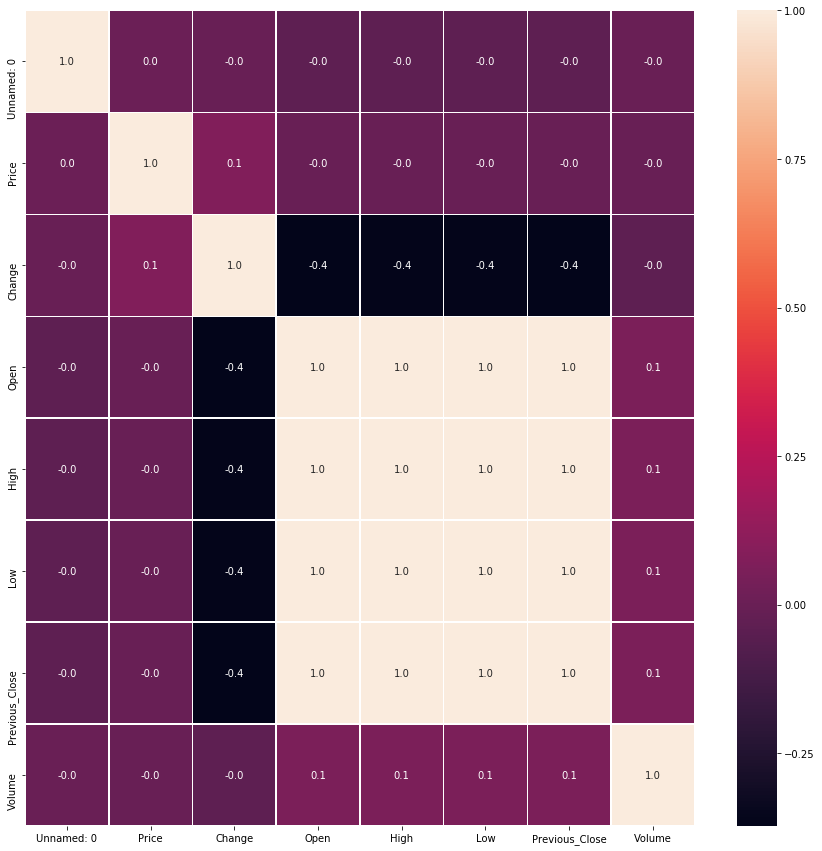

In [32]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(marketData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

There appears to be a strong positive correlation between Open, High, Low, and Previous Close. We'll have to investigate a bit later

In [33]:
marketData.columns

Index(['Unnamed: 0', 'Symbol', 'Name', 'Price', 'Change', 'Change_Percent',
       'Open', 'High', 'Low', 'Previous_Close', 'Volume', 'Latest_Trading_Day',
       'Industry', 'Sector', 'Summary_Quote'],
      dtype='object')

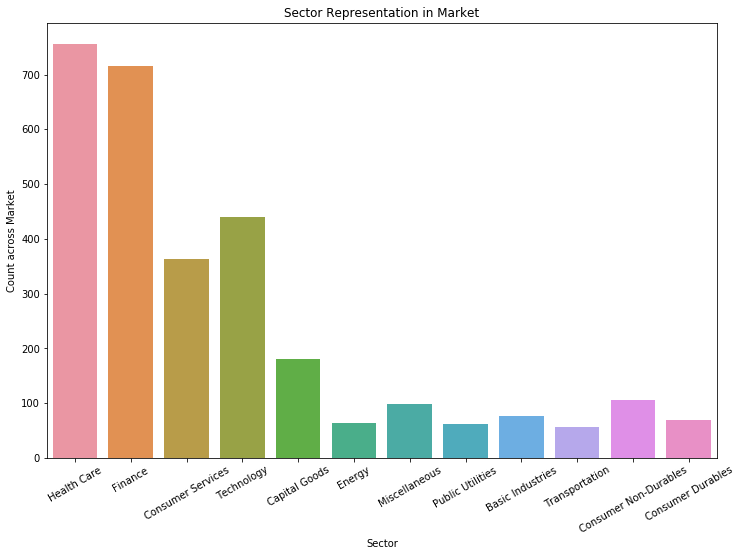

In [82]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Sector', 
              data = marketData,
              linewidth = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.xlabel("Sector")
plt.ylabel("Count across Market")
plt.title("Sector Representation in Market")
plt.show()

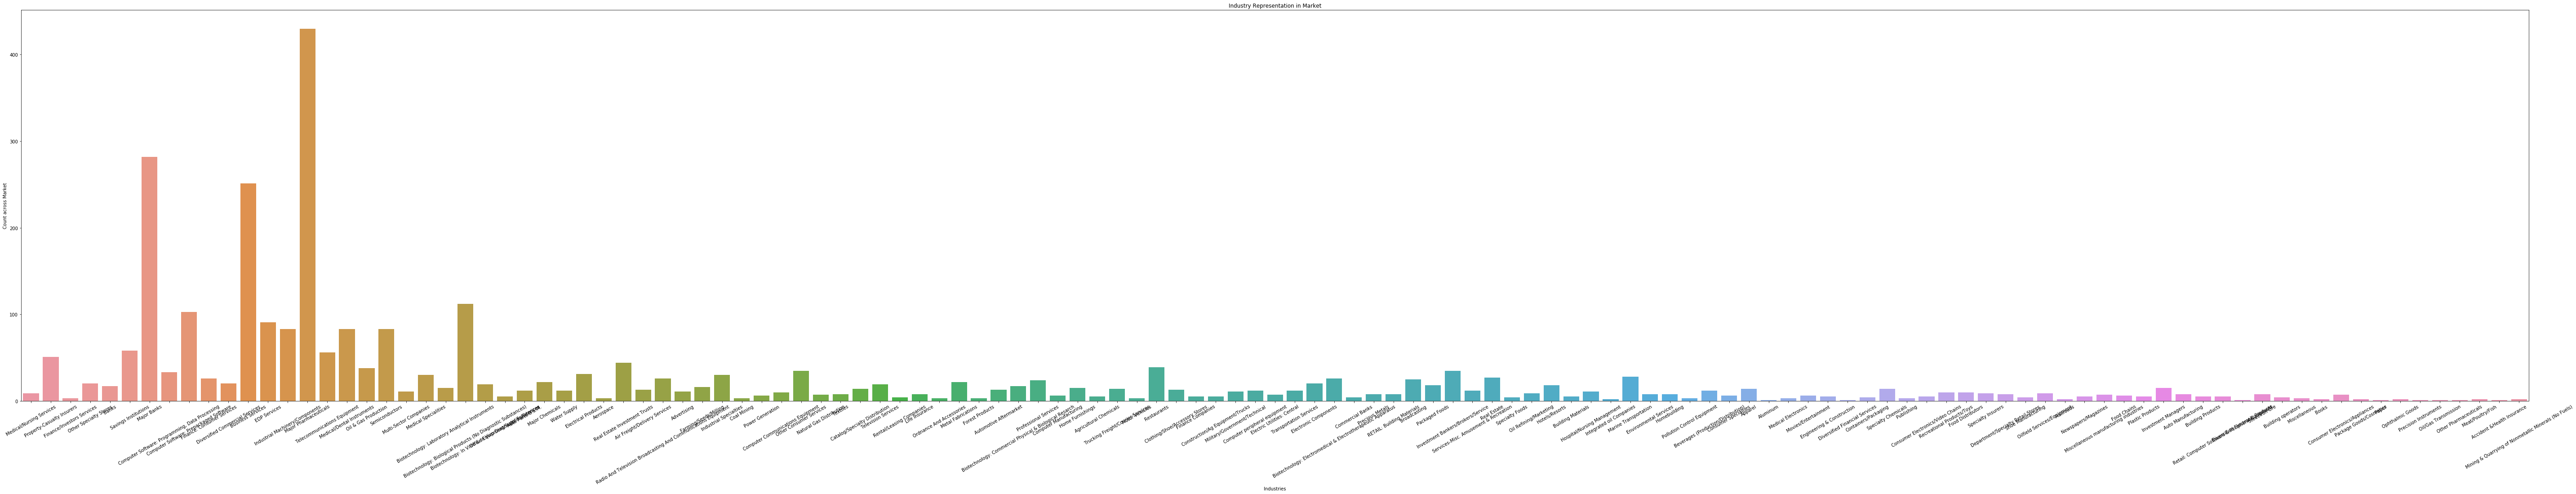

In [85]:
plt.figure(figsize = (100, 16))
ax = sns.countplot(x = 'Industry', 
              data = marketData,
              linewidth = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.xlabel("Industries")
plt.ylabel("Count across Market")
plt.title("Industry Representation in Market")
plt.show()